# Prediction of Strokes

## Problem

This notebook is intented to answer key questions of predicting the event of a stroke depending on different physical conditions and living habits. The dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) provides information on >5000 patients and provides information on age, gender, glucose level, bmi and more. The following notebook will intent to tackle different questions and problems:
1. Analyze and clean the data for proper analysis
2. Visualize the relationships of different parameters and the distribution of people across the different categories
3. Employ Machine Learning models to predict the outcome of a stroke depending on different parameters

## 1. Loading Libraries

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Load the data, convert them to a dataframe and analyse the data

In [339]:
df = pd.read_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [343]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [345]:
round(df.describe(exclude = 'object'),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


## Inspection of the dataset

The dataset contains entries of 5110 individuals and give information on the following parameters:

**Numerical, continuous**: id, age, avg_glucose_level, bmi

**Categorical**: gender, hypertension,heart_disease, ever_married, work_type, Residence_type, smoking_status

**Binary target**: _stroke_

Some key findings:
- The average age of all individuals of 43 years, with a minimum value o 0.08 (?)
- The maxmimum BMI is 97.6 -> better check later on
- The column BMI contains missing values

## Visual representation of missing values

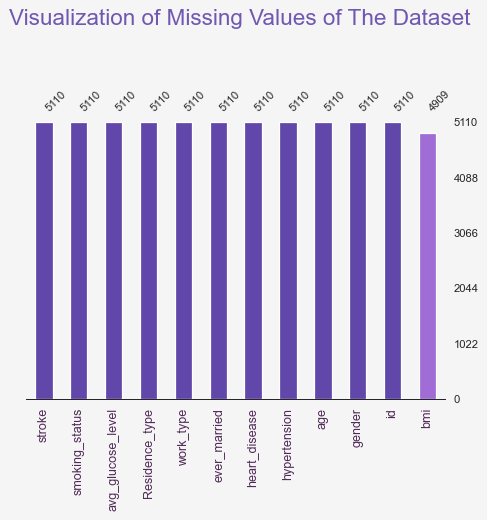

In [349]:
color = ['#6247AA','#6247AA','#6247AA','#6247AA','#6247AA','#6247AA','#6247AA','#6247AA','#6247AA','#6247AA','#6247AA','#A06CD5']
fig, ax = plt.subplots(figsize = (6,4), dpi = 90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
msno.bar(df, sort = 'descending', color = color, ax = ax, fontsize =9, labels = 'off',filter = 'top')
ax.text(-1,1.35,'Visualization of Missing Values of The Dataset', fontdict={'family': 'Arial', 'fontsize': 18, 'color': '#6247AA'}, alpha=0.9)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Arial','weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels([])
ax.set_yticks([])
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
plt.show()

Visually it is easy to see that the BMI columns contains missing values.
A common way to tackle is problem is to replace the missing values by the mean of the column:

In [351]:
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [352]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Binning of numerical variables

Continuous values could be problematic for feature extraction. Thus, the numerical values age, avg_glucose_level and BMI are binned.

In [354]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['underweight', 'optimal', 'overweight', 'obese'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['kid', 'teen', 'adult','mid-adult','elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['low', 'normal', 'high', 'very_high'])

In [355]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese,elderly,high
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,overweight,elderly,high
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese,elderly,normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese,mid-adult,high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,optimal,elderly,high


## Visual Analysis of the data

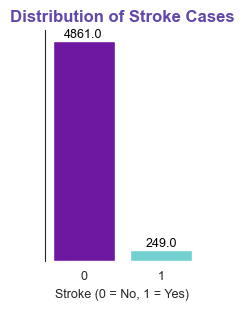

In [357]:
sns.set_style("white")
colors = ["#7400b8", "#64dfdf"]  # Blue for No Stroke, Red for Stroke
plt.figure(figsize=(2, 3))  # Adjust figure size
ax = sns.countplot(x='stroke', data=df, hue='stroke', palette=colors, legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black')
plt.title("Distribution of Stroke Cases", fontdict={'family': 'Arial', 'fontsize': 12, 'fontweight': 'bold', 'color': '#6247AA'})
plt.xlabel("Stroke (0 = No, 1 = Yes)", fontsize=9)
plt.xticks(fontsize=9)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


It is easy to see that the dataset is **severely imbalanced** and that training this dataset will lead to a high accuracy of healthy predictions. For further analysis, the data set has to be either over- or undersampled.

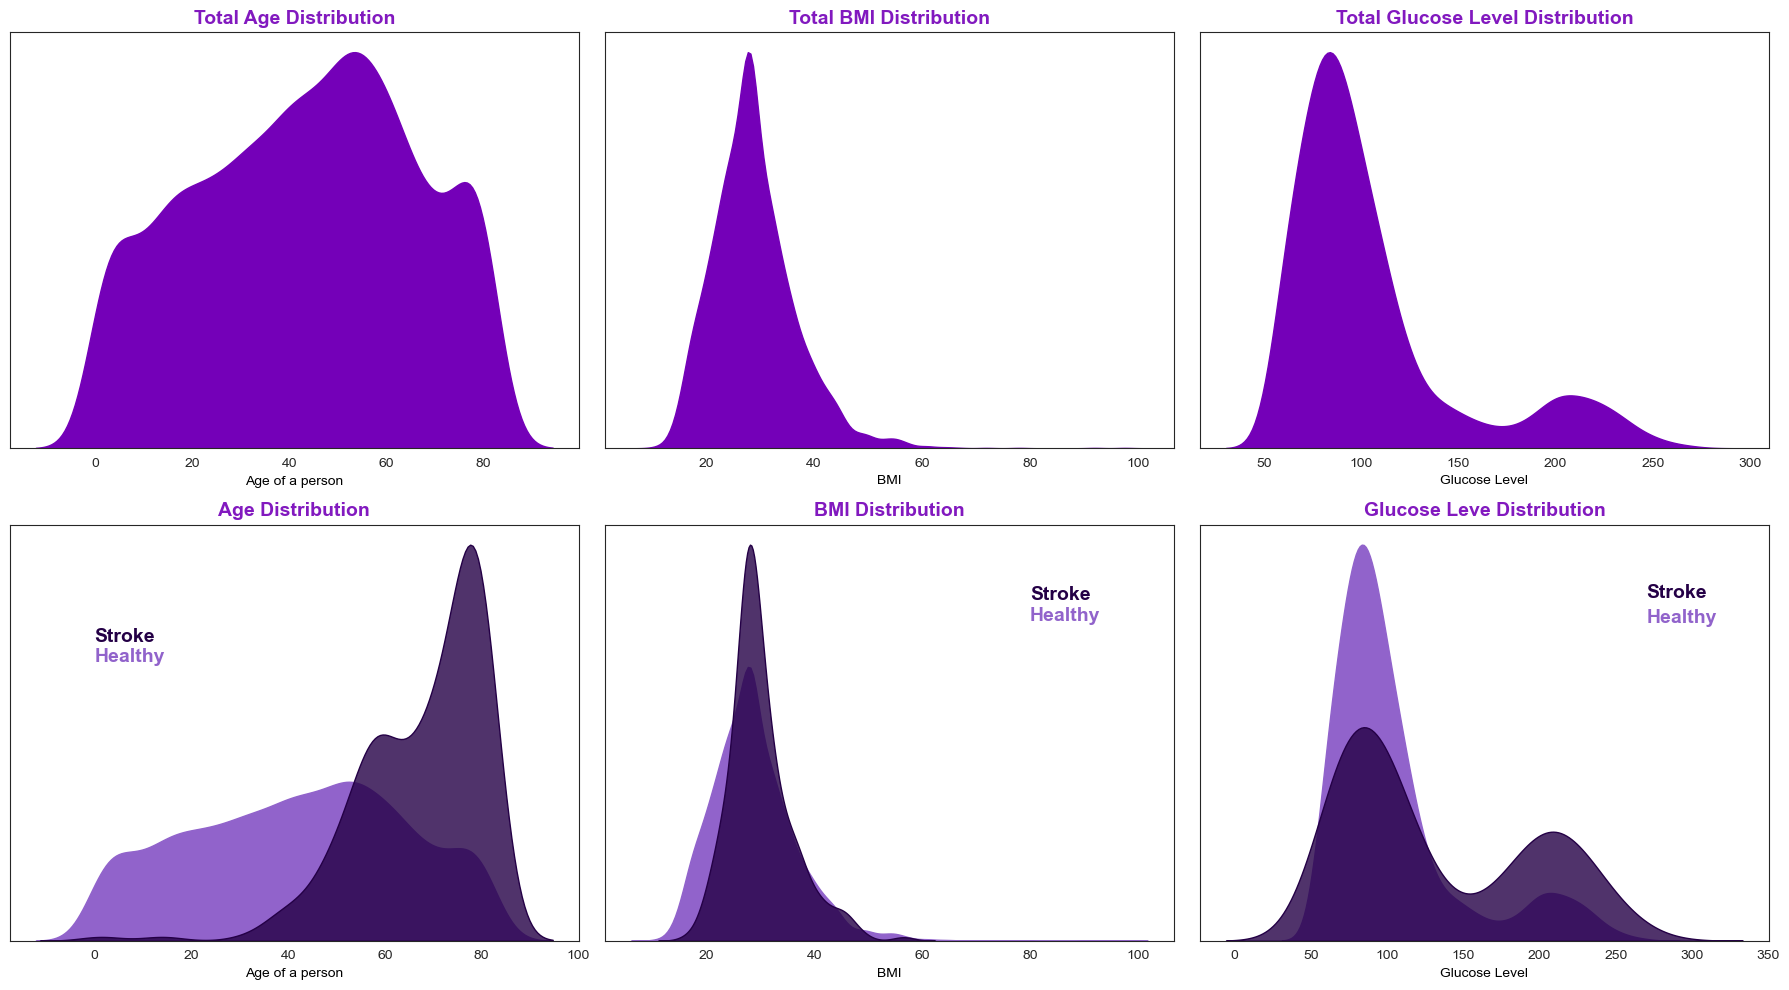

In [365]:
# Set the style
sns.set_style("white")

# Create the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 1 row, 3 columns

# Define font size
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 12

# Plot age dsitribution
sns.kdeplot(data=df, x='age', ax=axes[0,0], fill=True, color='#7400b8', alpha=1)
axes[0,0].set_xlabel('Age of a person', fontdict = {'font':'Arial', 'color': 'black', 'size': 10})
axes[0,0].set_title('Total Age Distribution', {'font':'Arial', 'color': '#7400b8','weight':'bold','size':14}, alpha = 0.9)
axes[0,0].get_yaxis().set_visible(False)

sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = axes[1,0], fill = True,  alpha = 1, color = '#9163CB')
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = axes[1,0], fill = True,  alpha = 0.8, color = '#240046')
axes[1,0].set_xlabel('Age of a person', fontdict = {'font':'Arial', 'color': 'black', 'size': 10})
axes[1,0].set_title('Age Distribution', {'font':'Arial', 'color': '#7400b8','weight':'bold','size':14}, alpha = 0.9)
axes[1,0].text(0,0.03, 'Stroke',{'font':'Arial', 'size':'14','color': '#240046','weight':'bold'})
axes[1,0].text(0,0.028, 'Healthy',{'font':'Arial', 'size':'14','color': '#9163CB','weight':'bold'})
axes[1,0].get_yaxis().set_visible(False)

# Plot BMI Distribution
sns.kdeplot(data=df, x='bmi', ax=axes[0,1], fill=True, color='#7400b8', alpha=1)
axes[0,1].set_xlabel('BMI', fontdict = {'font':'Arial', 'color': 'black', 'size': 10})
axes[0,1].set_title('Total BMI Distribution', {'font':'Arial', 'color': '#7400b8','weight':'bold','size':14}, alpha = 0.9)
axes[0,1].get_yaxis().set_visible(False)

sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = axes[1,1], fill = True,  alpha = 1, color = '#9163CB')
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = axes[1,1], fill = True,  alpha = 0.8, color = '#240046')
axes[1,1].set_xlabel('BMI', fontdict = {'font':'Arial', 'color': 'black', 'size': 10})
axes[1,1].set_title('BMI Distribution', {'font':'Arial', 'color': '#7400b8','weight':'bold','size':14}, alpha = 0.9)
axes[1,1].text(80,0.08, 'Stroke',{'font':'Arial', 'size':'14','color': '#240046','weight':'bold'})
axes[1,1].text(80,0.075, 'Healthy',{'font':'Arial', 'size':'14','color': '#9163CB','weight':'bold'})
axes[1,1].get_yaxis().set_visible(False)

# Plot Avg Glucose Level Distribution
sns.kdeplot(data=df, x='avg_glucose_level', ax=axes[0,2], fill=True, color='#7400b8', alpha=1)
axes[0,2].set_xlabel('Glucose Level', fontdict = {'font':'Arial', 'color': 'black', 'size': 10})
axes[0,2].set_title('Total Glucose Level Distribution', {'font':'Arial', 'color': '#7400b8','weight':'bold','size':14}, alpha = 0.9)
axes[0,2].get_yaxis().set_visible(False)

sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = axes[1,2], fill = True,  alpha = 1, color = '#9163CB')
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = axes[1,2], fill = True,  alpha = 0.8, color = '#240046')
axes[1,2].set_xlabel('Glucose Level', fontdict = {'font':'Arial', 'color': 'black', 'size': 10})
axes[1,2].set_title('Glucose Leve Distribution', {'font':'Arial', 'color': '#7400b8','weight':'bold','size':14}, alpha = 0.9)
axes[1,2].text(270,0.014, 'Stroke',{'font':'Arial', 'size':'14','color': '#240046','weight':'bold'})
axes[1,2].text(270,0.013, 'Healthy',{'font':'Arial', 'size':'14','color': '#9163CB','weight':'bold'})
axes[1,2].get_yaxis().set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


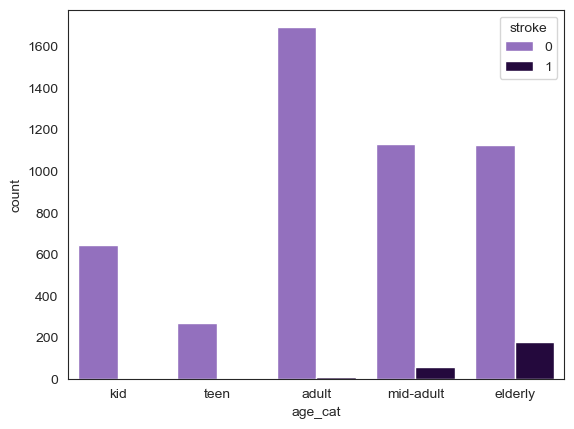

In [366]:
age_stroke_counts = df.groupby(['age_cat', 'stroke'], observed=False).size().reset_index(name='count')
ax = sns.barplot(x='age_cat', y='count', hue='stroke', data=age_stroke_counts, 
                 palette={0: "#9163CB", 1: "#240046"})

## Age effect on Strokes

Based on these visualizations it is very easy to see that age has a very strong impact of the event of a stroke

## Distribution of values across categorical values

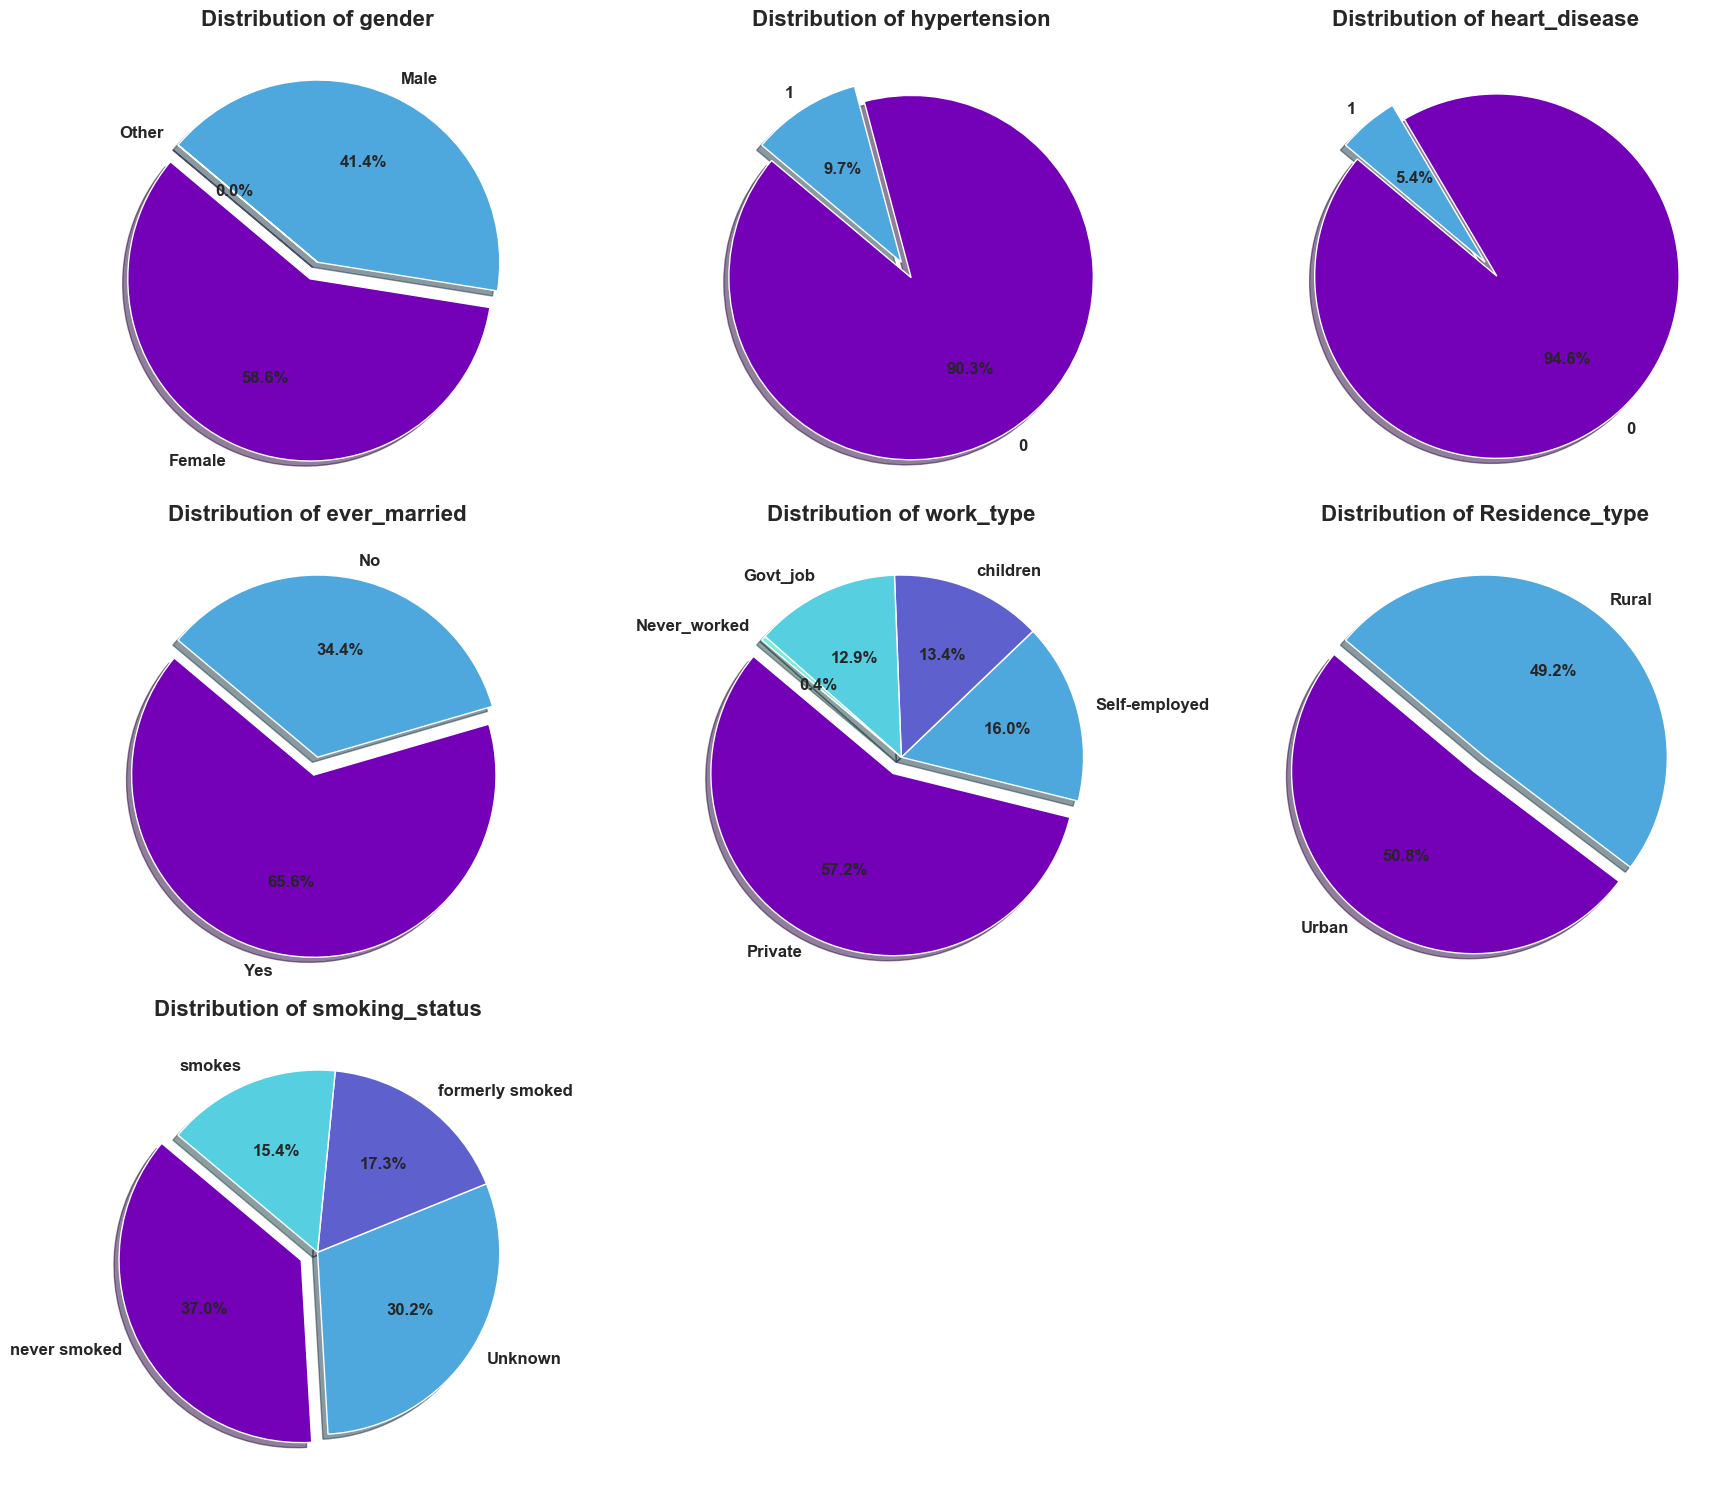

In [371]:

# Define categorical variables to visualize
categorical_columns = ["gender", "hypertension", "heart_disease", "ever_married", 
                       "work_type", "Residence_type", "smoking_status"]

# Define the number of rows and columns for subplots
num_cols = 3  # Number of columns in the grid
num_rows = -(-len(categorical_columns) // num_cols)  # Compute required rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Define custom colors
colors_list = ["#7400b8", "#4ea8de", "#5e60ce", "#56cfe1", "#72efdd", "#80ffdb", "#c19ee0"]

# Loop through categorical columns and plot pie charts
for i, col in enumerate(categorical_columns):
    value_counts = df[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    # Exploding the largest slice for emphasis
    explode = [0.1 if idx == 0 else 0 for idx in range(len(labels))]

    # Plot pie chart
    wedges, texts, autotexts = axes[i].pie(
        sizes, labels=labels, autopct='%1.1f%%', colors=colors_list[:len(labels)],
        startangle=140, explode=explode, shadow=True, wedgeprops={'edgecolor': 'white'}
    )

    # Improve text visibility
    for text in texts + autotexts:
        text.set_fontsize(12)
        text.set_weight('bold')

    axes[i].set_title(f"Distribution of {col}", fontsize=16, fontweight="bold")

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## How do these variables correlate with the outcome of a stroke?

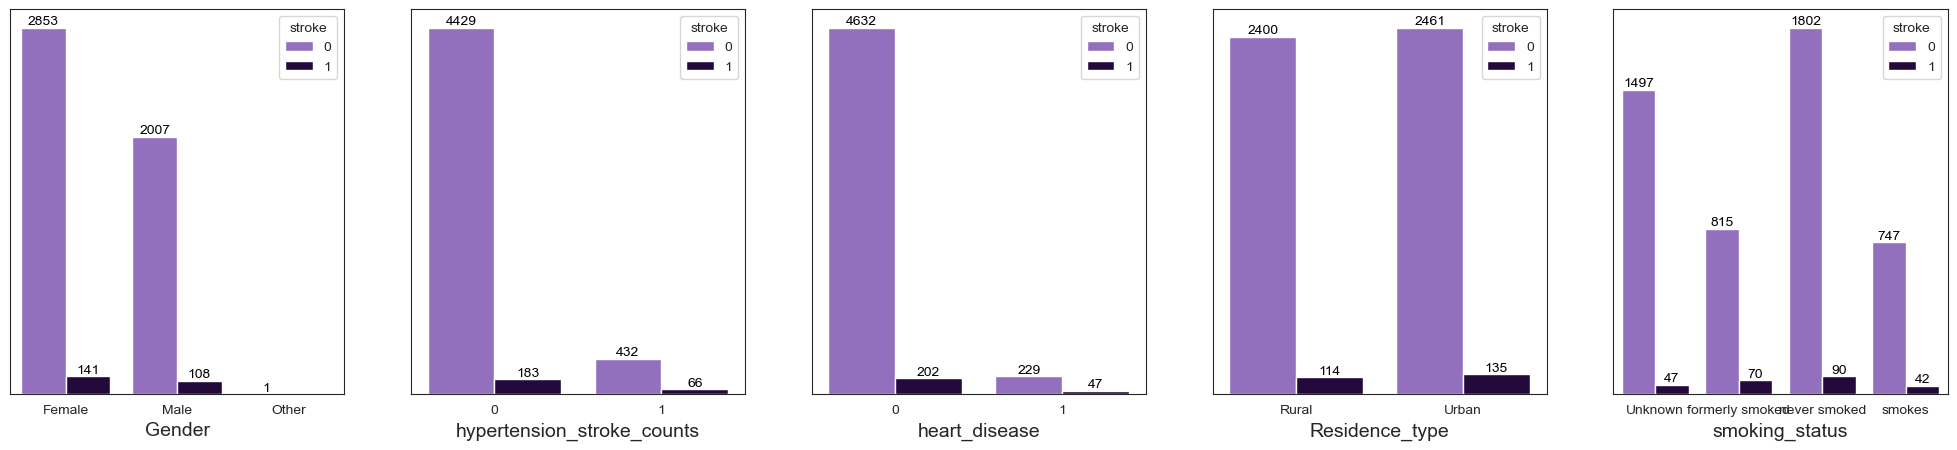

In [373]:
sns.set_style("white")

# Create the figure and axes
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 row, 3 columns

# Define font size
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 12

gender_stroke_counts = df.groupby(['gender', 'stroke'], observed=False).size().reset_index(name='count')
hypertension_stroke_counts = df.groupby(['hypertension', 'stroke'], observed=False).size().reset_index(name='count')
heart_disease_stroke_counts = df.groupby(['heart_disease', 'stroke'], observed=False).size().reset_index(name='count')
Residence_type_stroke_counts = df.groupby(['Residence_type', 'stroke'], observed=False).size().reset_index(name='count')
smoking_status_stroke_counts = df.groupby(['smoking_status', 'stroke'], observed=False).size().reset_index(name='count')



sns.barplot(x='gender', y='count', hue='stroke', data=gender_stroke_counts, palette={0: "#9163CB", 1: "#240046"}, ax=axes[0])
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:
        axes[0].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')
axes[0].set_xlabel("Gender", fontsize=label_fontsize)

sns.barplot(x='hypertension', y='count', hue='stroke', data=hypertension_stroke_counts, palette={0: "#9163CB", 1: "#240046"}, ax=axes[1])
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')
axes[1].set_xlabel("hypertension_stroke_counts", fontsize=label_fontsize)

sns.barplot(x='heart_disease', y='count', hue='stroke', data=heart_disease_stroke_counts, palette={0: "#9163CB", 1: "#240046"}, ax=axes[2])
for p in axes[2].patches:
    height = p.get_height()
    if height > 0:
        axes[2].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')
axes[2].set_xlabel("heart_disease", fontsize=label_fontsize)

sns.barplot(x='Residence_type', y='count', hue='stroke', data=Residence_type_stroke_counts, palette={0: "#9163CB", 1: "#240046"}, ax=axes[3])
for p in axes[3].patches:
    height = p.get_height()
    if height > 0:
        axes[3].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')
axes[3].set_xlabel("Residence_type", fontsize=label_fontsize)

sns.barplot(x='smoking_status', y='count', hue='stroke', data=smoking_status_stroke_counts, palette={0: "#9163CB", 1: "#240046"}, ax=axes[4])
for p in axes[4].patches:
    height = p.get_height()
    if height > 0:
        axes[4].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')
axes[4].set_xlabel("smoking_status", fontsize=label_fontsize)

axes[1].get_yaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)
axes[3].get_yaxis().set_visible(False)
axes[4].get_yaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

## Takeaways

1. Gender does not seem to affect the outcome of a stroke
2. Hypertension seems to increase to risk of a stroke
3. Heart disease does seem to increase the risk of a stroke
4. Residence type does not affect stroke risk
5. Smoking does not seem to have a large effect

## Visualize correlations

In [393]:
df2 = df.copy()

In [413]:
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
df2['age'] = df2['age'].apply(lambda x: np.log(x+10)*3)
df2['avg_glucose_level'] = df2['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df2['bmi'] = df2['bmi'].apply(lambda x: np.log(x+10)*2)
# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

## label encoding of ordinal categorical features
for col in df2.columns:
    df2[col] = le.fit_transform(df2[col])
    
cols = df2.columns
## normalizing with standard scaler of numerical features
df2[cols] = ss.fit_transform(df2[cols])


# correlation map for all the features
df_corr = df2.drop(columns = ['id']).corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool_))

In [415]:
df_corr = df2.drop(columns = ['id']).corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool_))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

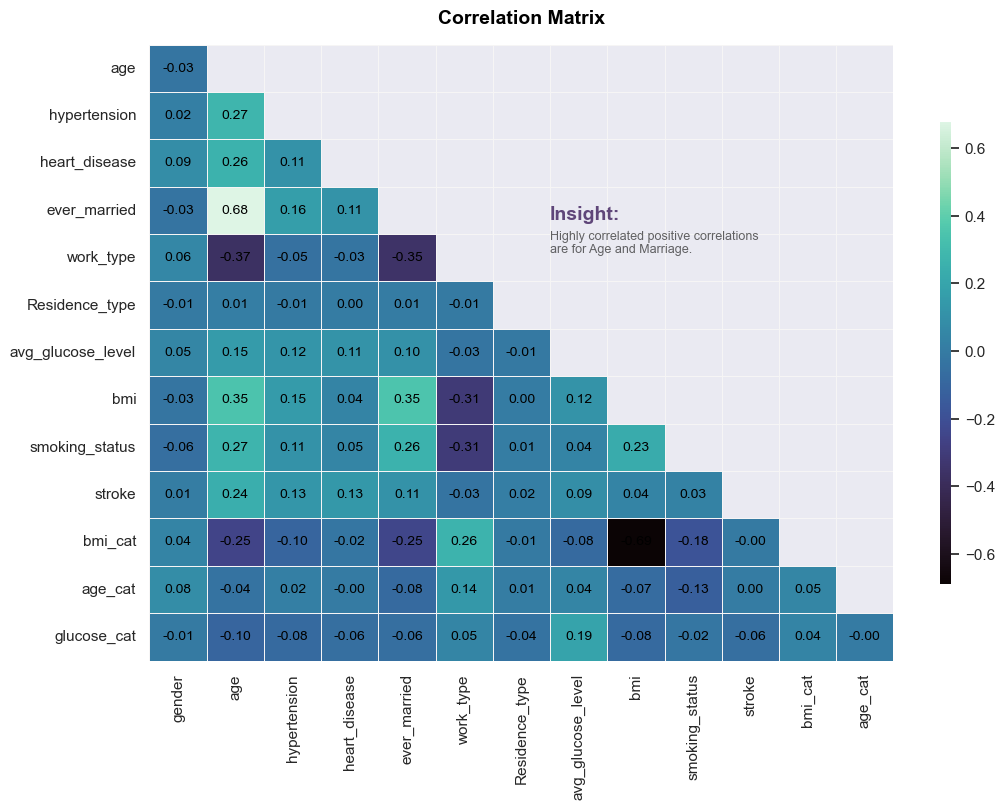

In [439]:
sns.set_theme(style="dark")
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    corr,
    mask = mask,
    cmap="mako",
    fmt=".2f",
    annot=True,
    linewidths=0.5,
    linecolor="#f6f5f5",
    annot_kws={"size": 10, "color": "black"},
    cbar_kws={"shrink": 0.75, "aspect": 40},
)
plt.title("Correlation Matrix", fontsize=14, color="Black", fontweight="bold", pad=15)
ax.text(7,4.4, 'Highly correlated positive correlations \nare for Age and Marriage.',{'font':'Arial', 'size': 9},alpha = 0.7)
ax.text(7,3.7, 'Insight:',{'font':'Arial', 'size':'14','color': '#240046','weight':'bold'},alpha = 0.7)
plt.show()

## As seen before the data are highly imbalanced since there a much less cases of strokes
-> rebalance the data

In [449]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese,elderly,high
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,overweight,elderly,high
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese,elderly,normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese,mid-adult,high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,optimal,elderly,high


In [452]:
df_cat = df.copy()

In [454]:
# Encode categorical variables
categorical_cols = ["gender", "hypertension", "heart_disease", "ever_married",
                    "work_type", "Residence_type", "smoking_status", "bmi_cat", "age_cat","glucose_cat"]

label_encoders = {} #store future encoders
for col in categorical_cols:
    le = LabelEncoder() #initialize
    df_cat[col] = le.fit_transform(df_cat[col]) #transform to numerical format
    label_encoders[col] = le 

In [468]:
X = df_cat.drop(columns=["id", "stroke"])  # Drop 'id' as it's not useful
y = df_cat["stroke"]
# training and testing data split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 2021)

#smoteresampling 
smote = SMOTE()
X_train_resampled, y_train_resample = smote.fit_resample(X_train, y_train.to_numpy())

print('Shape of Training features: {}'.format(X_resample.shape))
print('Shape of Training targets: {}'.format(y_resample.shape))
print('Shape of Testing features: {}'.format(X_test.shape))
print('Shape of Testing targets: {}'.format(y_test.shape))


Shape of Training features: (7284, 13)
Shape of Training targets: (7284,)
Shape of Testing features: (1278, 13)
Shape of Testing targets: (1278,)


In [470]:
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


In [472]:
X_train_rescaled

array([[ 1.42830943, -2.1222863 , -0.31301774, ...,  2.14480624,
         0.59287704, -0.26763679],
       [ 1.42830943, -0.37561979, -0.31301774, ...,  1.05322095,
         1.5262067 ,  0.97011965],
       [ 1.42830943,  0.38574766,  3.19470716, ...,  1.05322095,
        -0.34045262, -0.26763679],
       ...,
       [-0.69925823,  1.07727467, -0.31301774, ..., -0.03836434,
        -0.34045262,  0.97011965],
       [-0.69925823, -0.0629759 , -0.31301774, ...,  1.05322095,
         1.5262067 , -0.26763679],
       [ 1.42830943,  0.1410649 , -0.31301774, ..., -1.12994962,
         1.5262067 , -0.26763679]])

# 1. RF Classifier

In [482]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=2021)
rf_model.fit(X_train_rescaled, y_resample)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9131455399061033

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1219
           1       0.15      0.19      0.17        59

    accuracy                           0.91      1278
   macro avg       0.55      0.57      0.56      1278
weighted avg       0.92      0.91      0.92      1278



# 2. Logistic Regression

In [484]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=2021)
lr_model.fit(X_train_rescaled, y_resample)

# Make Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7769953051643192

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      1219
           1       0.10      0.49      0.17        59

    accuracy                           0.78      1278
   macro avg       0.54      0.64      0.52      1278
weighted avg       0.93      0.78      0.84      1278



# 3. XGBoost

In [509]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric="logloss")
xgb_model.fit(X_train_rescaled, y_resample)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9194053208137715

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1219
           1       0.18      0.20      0.19        59

    accuracy                           0.92      1278
   macro avg       0.57      0.58      0.57      1278
weighted avg       0.92      0.92      0.92      1278



## 4. Gradient Boosting

In [493]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train_rescaled, y_resample)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8435054773082942

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91      1219
           1       0.12      0.37      0.18        59

    accuracy                           0.84      1278
   macro avg       0.54      0.62      0.55      1278
weighted avg       0.93      0.84      0.88      1278



## 5. Decision Tree

In [495]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_rescaled, y_resample)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8841940532081377

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1219
           1       0.11      0.20      0.14        59

    accuracy                           0.88      1278
   macro avg       0.53      0.56      0.54      1278
weighted avg       0.92      0.88      0.90      1278



## Given the results of the tested models, the best performing model is the XGBoost model with an F1 Score for hits of 0.19 and an accuracy of 92%

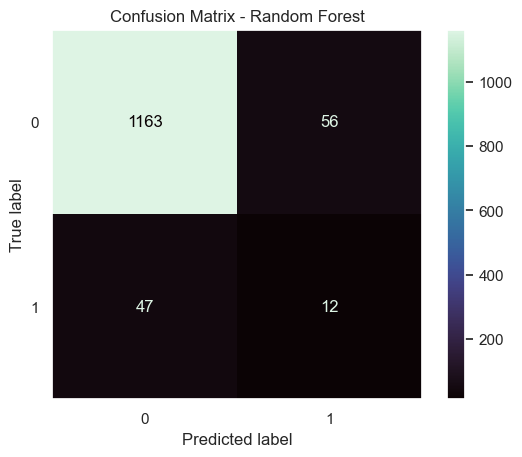

In [519]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap="mako")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## The model still performs poorly in predicting the actual true hits. Perform GridSearch for optimizing.

In [552]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_rescaled, y_resample)

# Best parameters & model
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_


C:\Users\Sabrina\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:51:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [553]:
y_pred_final = best_xgb_model.predict(X_test)

# Evaluate Final Model
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nFinal Classification Report:\n", classification_report(y_test, y_pred_final))


Final Model Accuracy: 0.92018779342723

Final Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1219
           1       0.17      0.19      0.18        59

    accuracy                           0.92      1278
   macro avg       0.56      0.57      0.57      1278
weighted avg       0.92      0.92      0.92      1278



## the F1 score is very low for the actual hits. 
Apply different probability threshold.

In [581]:
from sklearn.metrics import precision_recall_curve

y_probs = xgb_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
optimal_threshold = 0.3
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)


In [583]:
from sklearn.metrics import f1_score
print("Adjusted F1 Score:", f1_score(y_test, y_pred_adjusted))


Adjusted F1 Score: 0.2235294117647059


## This helped to improve the F1 score

Adjusted Threshold (0.3) - Model Performance:
Accuracy: 0.8967
ROC AUC Score: 0.7202

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      1219
           1       0.17      0.32      0.22        59

    accuracy                           0.90      1278
   macro avg       0.57      0.62      0.58      1278
weighted avg       0.93      0.90      0.91      1278


Confusion Matrix:
 [[1127   92]
 [  40   19]]


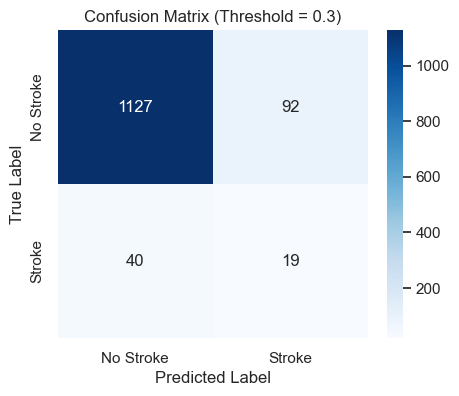

ValueError: 0.3 is not in list

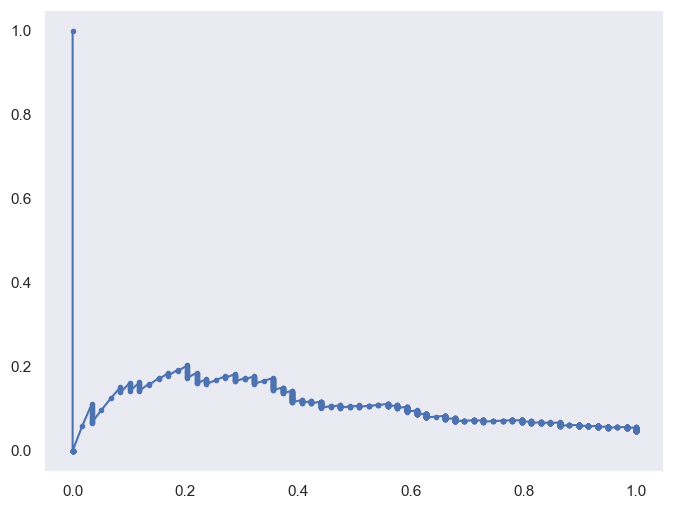

In [586]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Compute metrics for adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
classification_rep = classification_report(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, y_probs)

# Print evaluation metrics
print(f"Adjusted Threshold ({optimal_threshold}) - Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Threshold = {optimal_threshold})")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recalls, precisions, marker='.')
plt.axvline(x=recalls[list(thresholds).index(optimal_threshold)], linestyle='--', color='red', label=f"Threshold = {optimal_threshold}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


## Another problem could be feature importance

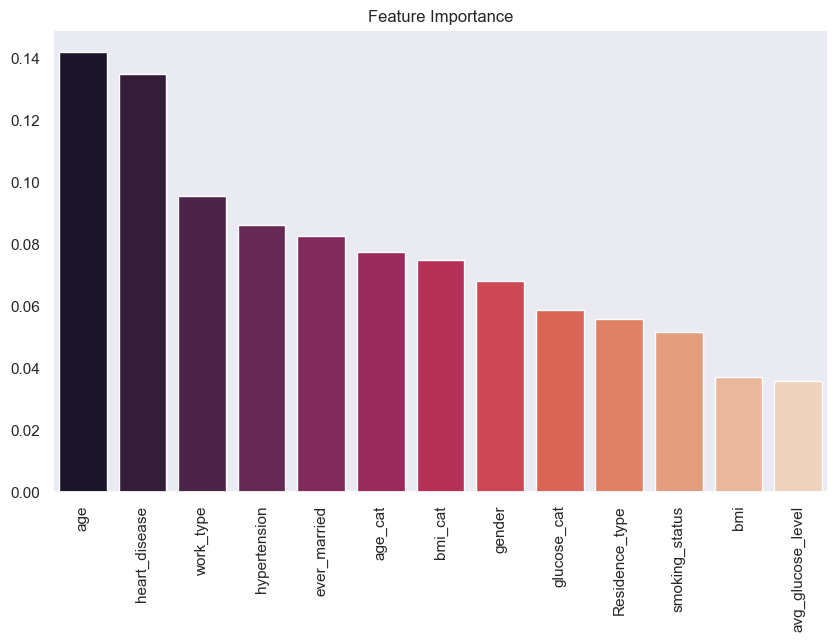

In [588]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(
    x=np.array(feature_names)[sorted_indices], 
    y=importances[sorted_indices], 
    hue=np.array(feature_names)[sorted_indices],
    palette="rocket",
    legend=False
)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()


In [590]:
top_8_features = feature_names[sorted_indices][:8]
X_train_top8 = X_train_rescaled[:, sorted_indices[:8]]
X_test_top8 = X_test[:, sorted_indices[:8]]

xgb_model.fit(X_train_top8, y_resample)
y_pred_top8 = xgb_model.predict(X_test_top8)

print("F1 Score (Top 8 Features):", f1_score(y_test, y_pred_top8))



F1 Score (Top 8 Features): 0.21333333333333335


## Model improved only marginally

## For Comarison Purposes we can also optimize Logistic Regression, since this had a high recall value.

In [602]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve

# Define hyperparameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=500)

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_rescaled, y_resample)

# Get best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_log_reg = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1438.44988828766}


Optimized Logistic Regression Accuracy: 0.7769953051643192

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      1219
           1       0.10      0.49      0.17        59

    accuracy                           0.78      1278
   macro avg       0.54      0.64      0.52      1278
weighted avg       0.93      0.78      0.84      1278



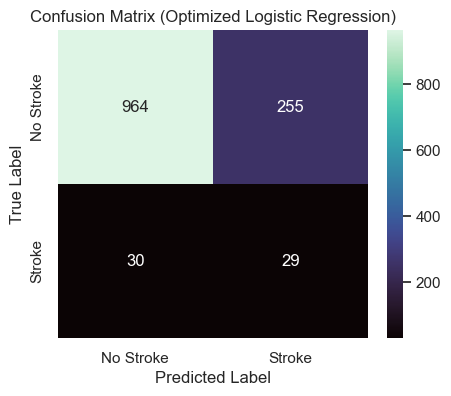

In [608]:
# Predictions
y_pred = best_log_reg.predict(X_test)

# Performance metrics
print("Optimized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="mako", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Optimized Logistic Regression)")
plt.show()


## The model did not improve dramatically

# Summary
## The overall performance of all models is not perfect with regards to the recall of actual stroke events. 
The dataset is highly imbalanced and thus the accurate recall of a stroke is complicated.
From an accuracy an f1 score perspective, the rebalanced an scaled XGBoost model performed best, although the logistic regression model had a higher recall.